In [1]:
import tensorflow as tf

if tf.test.is_built_with_cuda():
    print("CUDA is available.")
    
    gpus = tf.config.experimental.list_physical_devices('GPU')
    num_gpus = len(gpus)
    print(f"Number of GPUs available: {num_gpus}")

    for i, gpu in enumerate(gpus):
        print(f"GPU {i}: {gpu}")
else:
    print("CUDA is not available.")

CUDA is available.
Number of GPUs available: 1
GPU 0: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Import Library

In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Data Splitting

In [23]:
import os
import glob
import shutil
from sklearn.model_selection import train_test_split

class DatasetDivision:
    def __init__(self, root_dir="", output_dir=""):
        self.root_dir = root_dir
        self.output_dir = output_dir
        print("Instance of the class created")

    def printnow(self, new_dir):
        print("Just testing that the method calling is working " + new_dir)

    def divide_dataset(self, root_dir, output_dir):
        self.root_dir = root_dir
        self.output_dir = output_dir

        if not os.path.exists(self.output_dir):
            os.mkdir(self.output_dir)
        for split in ['train', 'val', 'test']:
            split_dir = os.path.join(self.output_dir, split)
            if not os.path.exists(split_dir):
                os.mkdir(split_dir)

        class_folders = os.listdir(root_dir)
        print(f"Class folders found: {class_folders}")

        for class_folder in class_folders:
            class_path = os.path.join(root_dir, class_folder)
            cropped_dir = os.path.join(class_path, 'CROPPED')

            if not os.path.exists(cropped_dir):
                print(f"Warning: The 'CROPPED' folder does not exist in {class_path}")
                continue

            class_files = glob.glob(os.path.join(cropped_dir, '*.bmp'))
            print(f"Found {len(class_files)} images in {cropped_dir}")

            if len(class_files) == 0:
                print(f"No images found in {cropped_dir}. Skipping this class.")
                continue

            # Pembagian pertama: Pisahkan 15% untuk pengujian, 85% untuk pelatihan dan validasi
            train_and_valid, test = train_test_split(class_files, test_size=0.15, random_state=42)

            # Pembagian kedua: Dari 85% yang tersisa, bagi menjadi 15% untuk validasi dan 70% untuk pelatihan
            train, val = train_test_split(train_and_valid, test_size=0.15 / 0.85, random_state=42)

            train_dir = os.path.join(self.output_dir, 'train', class_folder)
            val_dir = os.path.join(self.output_dir, 'val', class_folder)
            test_dir = os.path.join(self.output_dir, 'test', class_folder)

            if not os.path.exists(train_dir):
                os.mkdir(train_dir)
            if not os.path.exists(val_dir):
                os.mkdir(val_dir)
            if not os.path.exists(test_dir):
                os.mkdir(test_dir)

            for frame_file in train:
                shutil.copy(frame_file, os.path.join(train_dir, os.path.basename(frame_file)))
            for frame_file in val:
                shutil.copy(frame_file, os.path.join(val_dir, os.path.basename(frame_file)))
            for frame_file in test:
                shutil.copy(frame_file, os.path.join(test_dir, os.path.basename(frame_file)))

            print(f"Processed {class_folder}:")
            print(f"  - Train files: {len(train)}")
            print(f"  - Val files: {len(val)}")
            print(f"  - Test files: {len(test)}")

        print('Dataset Division finished.')

## Distribusi Data

In [24]:
path_dir = "D:/ViuMe_Paper/dataset_ori"
output_dir = "D:/ViuMe_Paper/sipakmed_split"
datasetdiv = DatasetDivision(root_dir=path_dir, output_dir=output_dir)
datasetdiv.printnow("The new guy")
datasetdiv.divide_dataset(root_dir=path_dir, output_dir=output_dir)

Instance of the class created
Just testing that the method calling is working The new guy
Class folders found: ['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']
Found 813 images in D:/ViuMe_Paper/dataset_ori\im_Dyskeratotic\CROPPED
Processed im_Dyskeratotic:
  - Train files: 569
  - Val files: 122
  - Test files: 122
Found 825 images in D:/ViuMe_Paper/dataset_ori\im_Koilocytotic\CROPPED
Processed im_Koilocytotic:
  - Train files: 577
  - Val files: 124
  - Test files: 124
Found 793 images in D:/ViuMe_Paper/dataset_ori\im_Metaplastic\CROPPED
Processed im_Metaplastic:
  - Train files: 555
  - Val files: 119
  - Test files: 119
Found 787 images in D:/ViuMe_Paper/dataset_ori\im_Parabasal\CROPPED
Processed im_Parabasal:
  - Train files: 550
  - Val files: 118
  - Test files: 119
Found 831 images in D:/ViuMe_Paper/dataset_ori\im_Superficial-Intermediate\CROPPED
Processed im_Superficial-Intermediate:
  - Train files: 581
  - Val files: 125

# Preprocessing - Padding-Final

In [8]:
import os
import cv2
import numpy as np

def constant_padding(image, size):
    top = (size - image.shape[0]) // 2
    bottom = size - image.shape[0] - top
    left = (size - image.shape[1]) // 2
    right = size - image.shape[1] - left
    padded_image = cv2.copyMakeBorder(image, 
                                      top=top, 
                                      bottom=bottom, 
                                      left=left, 
                                      right=right, 
                                      borderType=cv2.BORDER_CONSTANT, 
                                      value=[0, 0, 0])
    return padded_image

base_input_folder = 'D:/ViuMe_Paper/sipakmed_split'
base_output_folder = 'D:/ViuMe_Paper/sipakmed_padding'

desired_size = 600

for split in ['train', 'val', 'test']:
    split_input_folder = os.path.join(base_input_folder, split)
    split_output_folder = os.path.join(base_output_folder, split)

    for category in os.listdir(split_input_folder):
        category_input_folder = os.path.join(split_input_folder, category)
        category_output_folder = os.path.join(split_output_folder, category)
        os.makedirs(category_output_folder, exist_ok=True)

        for filename in os.listdir(category_input_folder):
            if filename.endswith('.bmp'):
                input_image_path = os.path.join(category_input_folder, filename)

                image = cv2.imread(input_image_path)

                padded_image = constant_padding(image, desired_size)

                output_image_path = os.path.join(category_output_folder, filename)
                cv2.imwrite(output_image_path, padded_image)

                print(f'Processed {filename} in {category} of {split} set')

print('All images have been processed and saved in the output folder.')

Processed 001_04.bmp in im_Dyskeratotic of train set
Processed 002_01.bmp in im_Dyskeratotic of train set
Processed 002_03.bmp in im_Dyskeratotic of train set
Processed 002_04.bmp in im_Dyskeratotic of train set
Processed 002_07.bmp in im_Dyskeratotic of train set
Processed 002_08.bmp in im_Dyskeratotic of train set
Processed 002_09.bmp in im_Dyskeratotic of train set
Processed 002_10.bmp in im_Dyskeratotic of train set
Processed 003_01.bmp in im_Dyskeratotic of train set
Processed 003_02.bmp in im_Dyskeratotic of train set
Processed 003_03.bmp in im_Dyskeratotic of train set
Processed 003_04.bmp in im_Dyskeratotic of train set
Processed 003_05.bmp in im_Dyskeratotic of train set
Processed 003_06.bmp in im_Dyskeratotic of train set
Processed 003_07.bmp in im_Dyskeratotic of train set
Processed 003_08.bmp in im_Dyskeratotic of train set
Processed 003_10.bmp in im_Dyskeratotic of train set
Processed 003_12.bmp in im_Dyskeratotic of train set
Processed 004_01.bmp in im_Dyskeratotic of tra

# ImageDataGenerator

In [2]:
from keras.preprocessing.image import ImageDataGenerator

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'D:/ViuMe_Paper/sipakmed_padding/train',
    target_size=(600, 600),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'D:/ViuMe_Paper/sipakmed_padding/val',
    target_size=(600, 600),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'D:/ViuMe_Paper/sipakmed_padding/test',
    target_size=(600, 600),
    batch_size=32,
    class_mode='categorical',
    shuffle=False 
)

Found 2832 images belonging to 5 classes.
Found 608 images belonging to 5 classes.
Found 609 images belonging to 5 classes.


In [2]:
test_generator.class_indices

{'im_Dyskeratotic': 0,
 'im_Koilocytotic': 1,
 'im_Metaplastic': 2,
 'im_Parabasal': 3,
 'im_Superficial-Intermediate': 4}

# VGG16

In [2]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.VGG16(input_shape=(600, 600, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers:
  layer.trainable = False
x = pre_trained_model.get_layer("block4_conv3").output
x = GlobalMaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', name="dense_1024")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax')(x)

modelvgg16 = Model(pre_trained_model.input, x)

modelvgg16.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model padding/bestmodel_vgg16.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)
# Train the model
history = modelvgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 91s 973ms/step - loss: 1.8552 - accuracy: 0.4154 - val_loss: 2.8344 - val_accuracy: 0.2467
Epoch 2/50
88/88 [==============================] - 76s 861ms/step - loss: 1.2527 - accuracy: 0.5804 - val_loss: 1.1610 - val_accuracy: 0.5378
Epoch 3/50
88/88 [==============================] - 76s 862ms/step - loss: 1.0838 - accuracy: 0.6414 - val_loss: 0.7171 - val_accuracy: 0.7336
Epoch 4/50
88/88 [==============================] - 76s 858ms/step - loss: 0.9412 - accuracy: 0.6832 - val_loss: 0.5861 - val_accuracy: 0.7714
Epoch 5/50
88/88 [==============================] - 76s 857ms/step - loss: 0.8950 - accuracy: 0.7054 - val_loss: 0.5318 - val_accuracy: 0.8026
Epoch 6/50
88/88 [==============================] - 75s 855ms/step - loss: 0.8668 - accuracy: 0.7107 - val_loss: 0.5185 - val_accuracy: 0.8076
Epoch 7/50
88/88 [==============================] - 76s 857ms/step - loss: 0.8501 - accuracy: 0.7250 - val_loss: 0.4657 - val_accuracy: 0.8289

20/20 [==============================] - 4s 193ms/step


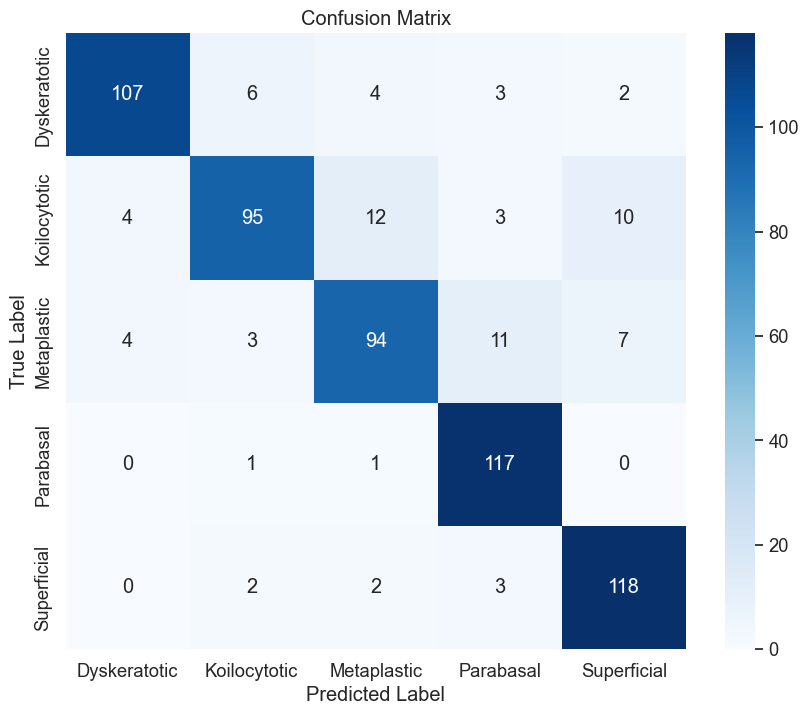


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     0.9304    0.8770    0.9030       122
            Koilocytotic     0.8879    0.7661    0.8225       124
             Metaplastic     0.8319    0.7899    0.8103       119
               Parabasal     0.8540    0.9832    0.9141       119
Superficial-Intermediate     0.8613    0.9440    0.9008       125

                accuracy                         0.8719       609
               macro avg     0.8731    0.8721    0.8701       609
            weighted avg     0.8734    0.8719    0.8702       609


Class: Dyskeratotic
True Positives (TP): 107
False Positives (FP): 8
False Negatives (FN): 15
True Negatives (TN): 479

Class: Koilocytotic
True Positives (TP): 95
False Positives (FP): 12
False Negatives (FN): 29
True Negatives (TN): 473

Class: Metaplastic
True Positives (TP): 94
False Positives (FP): 19
False Negatives (FN): 25
True Negatives (TN): 471

Class: Parabasal
Tr

In [19]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model padding/bestmodel_vgg16.h5'
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class


for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")


# VGG19

In [5]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.VGG19(input_shape=(600, 600, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers[:-10]:
    layer.trainable = False
x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax')(x)

modelvgg19 = Model(pre_trained_model.input, x)

modelvgg19.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model padding/bestmodel_vgg19.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)

# Train the model
history = modelvgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 111s 1s/step - loss: 1.4434 - accuracy: 0.3704 - val_loss: 2.6442 - val_accuracy: 0.2056
Epoch 2/50
88/88 [==============================] - 133s 2s/step - loss: 1.2557 - accuracy: 0.4582 - val_loss: 12.8941 - val_accuracy: 0.2056
Epoch 3/50
88/88 [==============================] - 77s 873ms/step - loss: 1.1560 - accuracy: 0.5057 - val_loss: 47.9520 - val_accuracy: 0.2056
Epoch 4/50
88/88 [==============================] - 77s 873ms/step - loss: 1.0866 - accuracy: 0.5321 - val_loss: 16.9796 - val_accuracy: 0.2056
Epoch 5/50
88/88 [==============================] - 77s 872ms/step - loss: 0.9858 - accuracy: 0.5768 - val_loss: 14.4994 - val_accuracy: 0.2056
Epoch 6/50
88/88 [==============================] - 77s 875ms/step - loss: 0.9496 - accuracy: 0.5950 - val_loss: 1.9275 - val_accuracy: 0.4424
Epoch 7/50
88/88 [==============================] - 77s 872ms/step - loss: 0.8725 - accuracy: 0.6332 - val_loss: 24.4015 - val_accuracy: 0.205

20/20 [==============================] - 5s 213ms/step


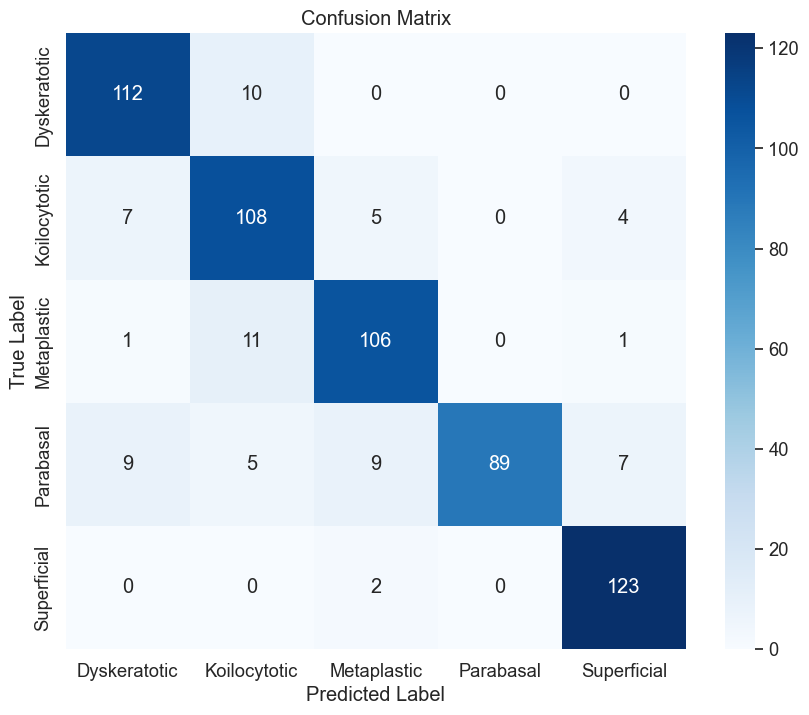


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     0.8682    0.9180    0.8924       122
            Koilocytotic     0.8060    0.8710    0.8372       124
             Metaplastic     0.8689    0.8908    0.8797       119
               Parabasal     1.0000    0.7479    0.8558       119
Superficial-Intermediate     0.9111    0.9840    0.9462       125

                accuracy                         0.8834       609
               macro avg     0.8908    0.8823    0.8822       609
            weighted avg     0.8902    0.8834    0.8826       609


Class: Dyskeratotic
True Positives (TP): 112
False Positives (FP): 17
False Negatives (FN): 10
True Negatives (TN): 470

Class: Koilocytotic
True Positives (TP): 108
False Positives (FP): 26
False Negatives (FN): 16
True Negatives (TN): 459

Class: Metaplastic
True Positives (TP): 106
False Positives (FP): 16
False Negatives (FN): 13
True Negatives (TN): 474

Class: Parabasal

In [20]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model padding/bestmodel_vgg19.h5' 
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class


for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")


# InceptionV3

In [2]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.InceptionV3(input_shape=(600, 600, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers:
    layer.trainable = False
x = pre_trained_model.get_layer("mixed7").output
x = GlobalMaxPool2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', name="dense_1024")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax')(x)

modelInceptionV3 = Model(pre_trained_model.input, x)

modelInceptionV3.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model padding/bestmodel_InceptionV3.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)
# Train the model
history = modelInceptionV3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 83s 904ms/step - loss: 1.3701 - accuracy: 0.5329 - val_loss: 1.1542 - val_accuracy: 0.4507
Epoch 2/50
88/88 [==============================] - 76s 864ms/step - loss: 0.9363 - accuracy: 0.6825 - val_loss: 0.7015 - val_accuracy: 0.7878
Epoch 3/50
88/88 [==============================] - 76s 860ms/step - loss: 0.8142 - accuracy: 0.7211 - val_loss: 0.5387 - val_accuracy: 0.8207
Epoch 4/50
88/88 [==============================] - 76s 860ms/step - loss: 0.7128 - accuracy: 0.7500 - val_loss: 0.4519 - val_accuracy: 0.8438
Epoch 5/50
88/88 [==============================] - 76s 860ms/step - loss: 0.6921 - accuracy: 0.7650 - val_loss: 0.3931 - val_accuracy: 0.8569
Epoch 6/50
88/88 [==============================] - 75s 855ms/step - loss: 0.6244 - accuracy: 0.7807 - val_loss: 0.3611 - val_accuracy: 0.8602
Epoch 7/50
88/88 [==============================] - 75s 855ms/step - loss: 0.6600 - accuracy: 0.7829 - val_loss: 0.3409 - val_accuracy: 0.8701

20/20 [==============================] - 3s 109ms/step


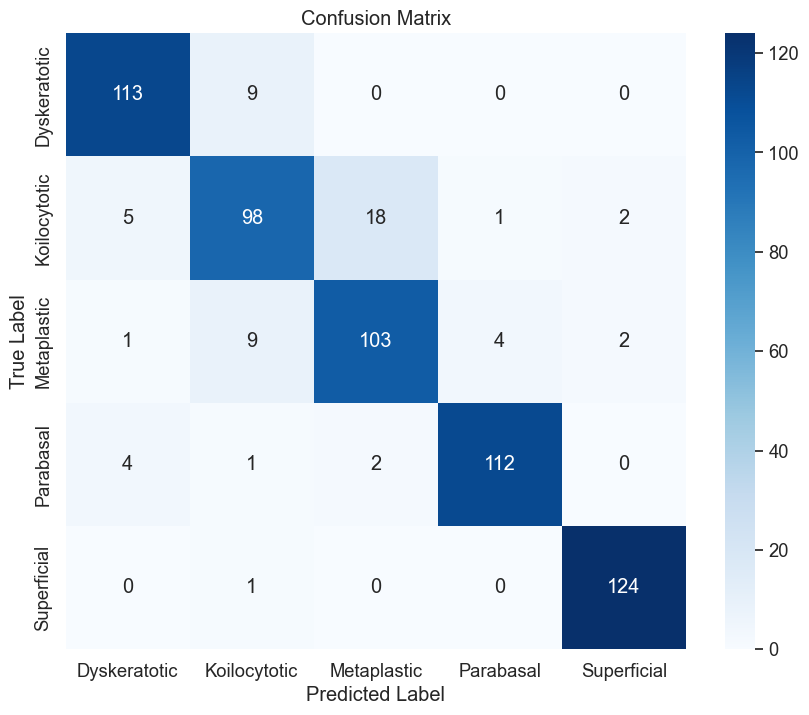


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     0.9187    0.9262    0.9224       122
            Koilocytotic     0.8305    0.7903    0.8099       124
             Metaplastic     0.8374    0.8655    0.8512       119
               Parabasal     0.9573    0.9412    0.9492       119
Superficial-Intermediate     0.9688    0.9920    0.9802       125

                accuracy                         0.9031       609
               macro avg     0.9025    0.9031    0.9026       609
            weighted avg     0.9027    0.9031    0.9027       609


Class: Dyskeratotic
True Positives (TP): 113
False Positives (FP): 10
False Negatives (FN): 9
True Negatives (TN): 477

Class: Koilocytotic
True Positives (TP): 98
False Positives (FP): 20
False Negatives (FN): 26
True Negatives (TN): 465

Class: Metaplastic
True Positives (TP): 103
False Positives (FP): 20
False Negatives (FN): 16
True Negatives (TN): 470

Class: Parabasal
T

In [21]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model padding/bestmodel_InceptionV3.h5'  
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class


for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# DenseNet201

In [2]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalMaxPooling2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.DenseNet201(input_shape=(600, 600, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers:
  layer.trainable = False
# Fine-tune beberapa lapisan terakhir
for layer in pre_trained_model.layers[-10:]:
    layer.trainable = True
x = pre_trained_model.get_layer("conv5_block16_concat").output
x = GlobalMaxPooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  
x = Dense(2048, activation='relu', name="dense_2048")(x)  
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(5, activation='softmax')(x)

modelDenseNet201 = Model(pre_trained_model.input, x)

modelDenseNet201.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model padding/bestmodel_DenseNet201.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)
# Train the model
history = modelDenseNet201.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 97s 1s/step - loss: 0.7774 - accuracy: 0.7446 - val_loss: 1.4347 - val_accuracy: 0.4688
Epoch 2/50
88/88 [==============================] - 81s 918ms/step - loss: 0.3928 - accuracy: 0.8675 - val_loss: 1.3026 - val_accuracy: 0.4145
Epoch 3/50
88/88 [==============================] - 79s 897ms/step - loss: 0.3071 - accuracy: 0.9000 - val_loss: 1.0742 - val_accuracy: 0.5724
Epoch 4/50
88/88 [==============================] - 79s 897ms/step - loss: 0.2792 - accuracy: 0.9043 - val_loss: 0.7434 - val_accuracy: 0.7434
Epoch 5/50
88/88 [==============================] - 89s 1s/step - loss: 0.2641 - accuracy: 0.9093 - val_loss: 0.4696 - val_accuracy: 0.8684
Epoch 6/50
88/88 [==============================] - 143s 2s/step - loss: 0.2191 - accuracy: 0.9236 - val_loss: 0.2407 - val_accuracy: 0.9227
Epoch 7/50
88/88 [==============================] - 89s 1s/step - loss: 0.2153 - accuracy: 0.9196 - val_loss: 0.1900 - val_accuracy: 0.9309
Epoch 8/50

20/20 [==============================] - 5s 209ms/step


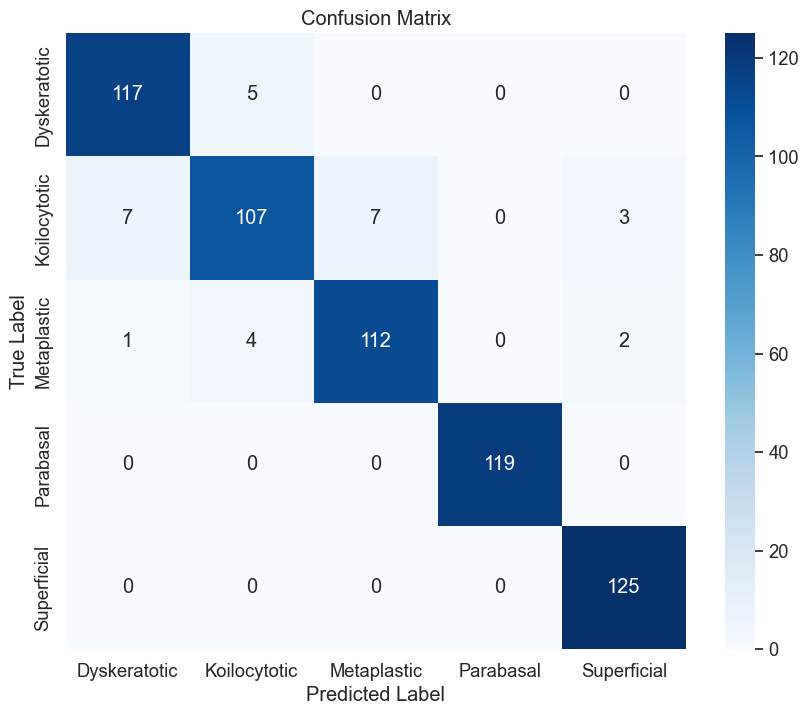


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     0.9360    0.9590    0.9474       122
            Koilocytotic     0.9224    0.8629    0.8917       124
             Metaplastic     0.9412    0.9412    0.9412       119
               Parabasal     1.0000    1.0000    1.0000       119
Superficial-Intermediate     0.9615    1.0000    0.9804       125

                accuracy                         0.9524       609
               macro avg     0.9522    0.9526    0.9521       609
            weighted avg     0.9520    0.9524    0.9519       609


Class: Dyskeratotic
True Positives (TP): 117
False Positives (FP): 8
False Negatives (FN): 5
True Negatives (TN): 479

Class: Koilocytotic
True Positives (TP): 107
False Positives (FP): 9
False Negatives (FN): 17
True Negatives (TN): 476

Class: Metaplastic
True Positives (TP): 112
False Positives (FP): 7
False Negatives (FN): 7
True Negatives (TN): 483

Class: Parabasal
True

In [22]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model padding/bestmodel_DenseNet201.h5' 
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class


for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# XceptionNet

In [2]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout

pre_trained_model = tf.keras.applications.Xception(input_shape=(600, 600, 3), weights='imagenet', include_top=False)
for layer in pre_trained_model.layers:
  layer.trainable = False
x = pre_trained_model.get_layer("block14_sepconv1_act").output
x = GlobalAveragePooling2D()(x)  
x = BatchNormalization()(x)
x = Dropout(0.4)(x) 
x = Dense(1024, activation='relu', name="dense_1024")(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  
x = Dense(512, activation='relu')(x)  
x = BatchNormalization()(x)
x = Dropout(0.4)(x)  
x = Dense(5, activation='softmax')(x)

modelXception = Model(pre_trained_model.input, x)


modelXception.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint('D:/ViuMe_Paper/best model padding/bestmodel_Xception.h5', 
                                    monitor='val_accuracy', 
                                    mode='max',
                                    save_best_only=True)
# Train the model
history = modelXception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
88/88 [==============================] - 93s 992ms/step - loss: 1.1864 - accuracy: 0.6057 - val_loss: 1.6422 - val_accuracy: 0.2039
Epoch 2/50
88/88 [==============================] - 76s 859ms/step - loss: 0.7074 - accuracy: 0.7489 - val_loss: 1.5930 - val_accuracy: 0.2993
Epoch 3/50
88/88 [==============================] - 75s 852ms/step - loss: 0.5788 - accuracy: 0.7929 - val_loss: 1.3512 - val_accuracy: 0.3849
Epoch 4/50
88/88 [==============================] - 75s 851ms/step - loss: 0.5603 - accuracy: 0.8143 - val_loss: 0.9971 - val_accuracy: 0.5855
Epoch 5/50
88/88 [==============================] - 75s 848ms/step - loss: 0.4769 - accuracy: 0.8314 - val_loss: 0.6885 - val_accuracy: 0.7188
Epoch 6/50
88/88 [==============================] - 81s 924ms/step - loss: 0.4673 - accuracy: 0.8450 - val_loss: 0.3679 - val_accuracy: 0.8602
Epoch 7/50
88/88 [==============================] - 78s 880ms/step - loss: 0.4522 - accuracy: 0.8364 - val_loss: 0.2904 - val_accuracy: 0.8882

20/20 [==============================] - 3s 133ms/step


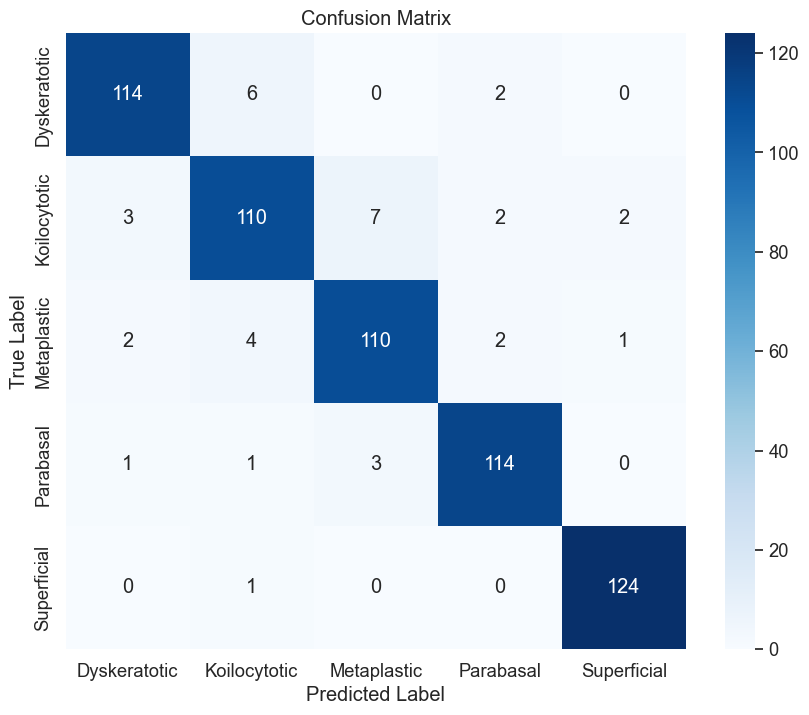


Classification Report:
                          precision    recall  f1-score   support

            Dyskeratotic     0.9500    0.9344    0.9421       122
            Koilocytotic     0.9016    0.8871    0.8943       124
             Metaplastic     0.9167    0.9244    0.9205       119
               Parabasal     0.9500    0.9580    0.9540       119
Superficial-Intermediate     0.9764    0.9920    0.9841       125

                accuracy                         0.9392       609
               macro avg     0.9389    0.9392    0.9390       609
            weighted avg     0.9391    0.9392    0.9391       609


Class: Dyskeratotic
True Positives (TP): 114
False Positives (FP): 6
False Negatives (FN): 8
True Negatives (TN): 481

Class: Koilocytotic
True Positives (TP): 110
False Positives (FP): 12
False Negatives (FN): 14
True Negatives (TN): 473

Class: Metaplastic
True Positives (TP): 110
False Positives (FP): 10
False Negatives (FN): 9
True Negatives (TN): 480

Class: Parabasal
Tr

In [23]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model
best_model_path = 'D:/ViuMe_Paper/best model padding/bestmodel_Xception.h5'  # Sesuaikan dengan path model Anda
best_model = load_model(best_model_path)

# Calculate predictions on testing set
y_pred_prob = best_model.predict(test_generator)
y_true = test_generator.classes

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
class_labels = [label.replace("im_", "").replace("Superficial-Intermediate", "Superficial") for label in test_generator.class_indices.keys()]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
target_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Detailed confusion matrix analysis for each class
for i in range(len(class_labels)):
    TP = confusion_mat[i, i]
    FP = sum(confusion_mat[:, i]) - TP
    FN = sum(confusion_mat[i, :]) - TP
    TN = sum(sum(confusion_mat)) - TP - FP - FN

    print(f"\nClass: {class_labels[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")